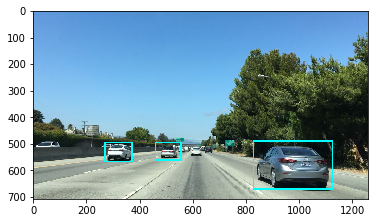

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('bbox-example-image.jpg')

# Define a function that takes an image, a list of bounding boxes, 
# and optional color tuple and line thickness as inputs
# then draws boxes in that color on the output
def draw_boxes(img, bboxes, color=(0, 255, 255), thick=6):
    # make a copy of the image
    draw_img = np.copy(img)
    # draw each bounding box on your image copy using cv2.rectangle()
    for each_bbox in bboxes:
        cv2.rectangle(draw_img, each_bbox[0], each_bbox[1], color, thick)
    # return the image copy with boxes drawn
    return draw_img # Change this line to return image copy with boxes

# Add bounding boxes in this format, these are just example coordinates.
bboxes = [((270,566), (372,495)), ((460,560), (556,495)), ((828, 668), (1125, 489))] 

result = draw_boxes(image, bboxes)
plt.imshow(result)
plt.show()

In [2]:
# Features & characteristics
# Features describe the characteristics of an object, and with images, 
# it really all comes down to intensity and gradients of intensity, 
# and how these features capture the color and shape of an object.
# - Raw pixel intensity gives Color and shape characteristics
# - Histogram of pixel intensity will give Color only characteristic
# - Gradients of pixel intensity will give Shape only characteristic

# You can use the raw pixel intensity of an image and 
# match it with the test image and since if it below the threshold

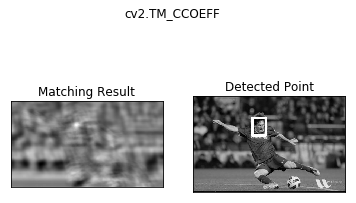

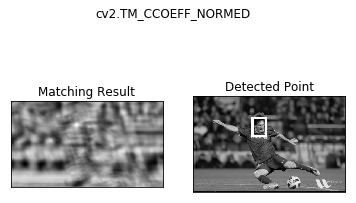

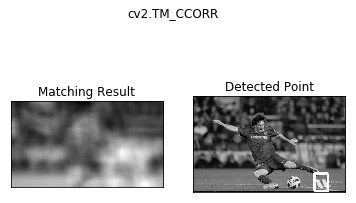

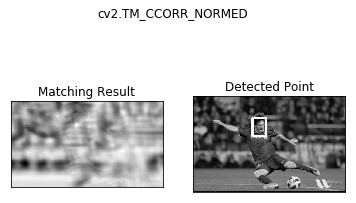

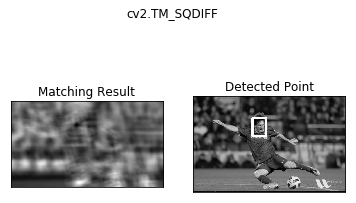

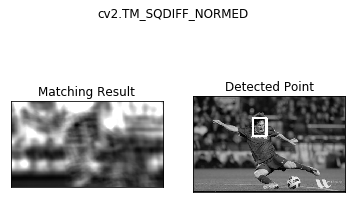

In [3]:
# Template matching 
# - Template Matching is a method for searching and finding the location of a template image in a larger image.
# OpenCV provides you with the handy function 
# cv2.matchTemplate() to search the image, and 
# cv2.minMaxLoc() to extract the location of the best match.

# You can choose between "squared difference" or "correlation" methods in using cv2.matchTemplate(), 
# but keep in mind with squared differences you need to locate the global minimum difference to find a match, 
# while for correlation, you're looking for a global maximum.
# i.e., If you are using cv2.TM_SQDIFF as comparison method, minimum value gives the best match
    
import cv2
import numpy as py
from matplotlib import pyplot as plt

img = cv2.imread('messi.jpg',0)
img2 = img.copy()
template = cv2.imread('messi_face.jpg',0) #template
w, h = template.shape[::-1]

#ALL the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 
           'cv2.TM_CCORR' , 'cv2.TM_CCORR_NORMED',
           'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
color = (255,0,0)
thickness = 6

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    
    #Apply template matching
    result = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    
    #If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv2.rectangle(img, top_left, bottom_right, color, thickness)
    
    plt.subplot(121), plt.imshow(result, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img, cmap='gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    
    plt.show()
    
# NOTE: The result using cv2.TM_CCORR is not expected to be good 

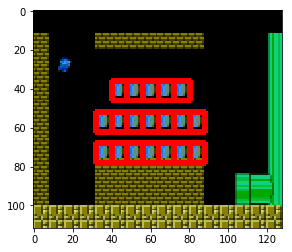

In [4]:
# Template Matching with Multiple Objects
# In the previous section, we searched image for Messi’s face, 
# which occurs only once in the image. Suppose you are searching 
# for an object which has multiple occurances, cv2.minMaxLoc() 
# won’t give you all the locations. 
# In that case, we will use thresholding. So in this example, 
# we will use a screenshot of the famous game Mario and 
# we will find the coins in it.

import cv2
import numpy as np
import matplotlib.pyplot as plt

img_rgb = cv2.imread('mario_coin_room.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('mario_coin_s.png', 0)
w, h = template.shape[::-1]

result = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
color = (255,0,0)
thickness = 2
loc = np.where(result >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), color, thickness)
    
cv2.imwrite('mario_coins_plotted.png', img_rgb)

img_to_show = cv2.imread('mario_coins_plotted.png')
plt.imshow(img_to_show)
plt.show()

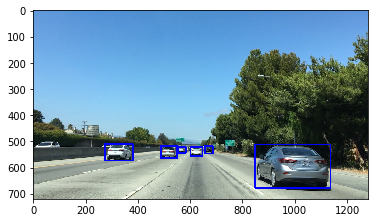

In [5]:
# Define a function that takes an image and a list of templates as inputs
# then searches the image and returns the a list of bounding boxes 
# for matched templates
def find_matches(img, template_list):
    # Define an empty list to take bbox coords
    bbox_list = []
    # Define matching method
    # Other options include: cv2.TM_CCORR_NORMED', 'cv2.TM_CCOEFF', 'cv2.TM_CCORR',
    #'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED'
    method = cv2.TM_CCOEFF_NORMED
    # Iterate through template list
    for template in template_list:
        # Read in templates one by one
        template_image = cv2.imread(template) #template
        #plt.imshow(template_image)
        #plt.show()
        w, h = (template_image.shape[1], template_image.shape[0])
        #print(w,h)
        # Use cv2.matchTemplate() to search the image
        # using whichever of the OpenCV search methods you prefer
        #Apply template matching
        
        result = cv2.matchTemplate(img, template_image, method)
        # Use cv2.minMaxLoc() to extract the location of the best match
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        #print("min_val",min_val)
        #print("max_val",max_val)
        #print("min_loc",min_loc)
        #print("max_loc",max_loc)
        
        # Determine bounding box corners for the match
        #If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

        bbox_list.append((top_left, bottom_right))
        
    # Return the list of bounding boxes
    return bbox_list

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('cutouts/bbox-example-image.jpg')
#image = mpimg.imread('temp-matching-example-2.jpg')
templist = ['cutouts/cutout1.jpg', 'cutouts/cutout2.jpg', 'cutouts/cutout3.jpg',
            'cutouts/cutout4.jpg', 'cutouts/cutout5.jpg', 'cutouts/cutout6.jpg']

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

bboxes = find_matches(image, templist)
result = draw_boxes(image, bboxes)
plt.imshow(result)
plt.show()

In [7]:
##########################################################################
## TEMPLATE MATCHING WONT WORK FOR SECOND IMAGE temp-matching-example-2
#In the temp-matching-example-2 image, all of the same six cars are visible 
#(just a few seconds later in the video), but you will find that none of the 
#templates find the correct match! This is because with template matching we 
#can only find very close matches, and changes in size or orientation of a 
#car make it impossible to match with a template.

#That is right! Only the image where the car is very close to the same 
# - size,  
# - orientation, and 
# - color (raw pizel intesity) will be a match to this template.
##########################################################################

# Define a function that takes an image and a list of templates as inputs
# then searches the image and returns the a list of bounding boxes 
# for matched templates
def find_matches(img, template_list):
    # Define an empty list to take bbox coords
    bbox_list = []
    # Define matching method
    # Other options include: cv2.TM_CCORR_NORMED', 'cv2.TM_CCOEFF', 'cv2.TM_CCORR',
    #'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED'
    method = cv2.TM_CCOEFF_NORMED
    # Iterate through template list
    for template in template_list:
        # Read in templates one by one
        template_image = cv2.imread(template) #template
        #plt.imshow(template_image)
        #plt.show()
        w, h = (template_image.shape[1], template_image.shape[0])
        #print(w,h)
        # Use cv2.matchTemplate() to search the image
        # using whichever of the OpenCV search methods you prefer
        #Apply template matching
        
        result = cv2.matchTemplate(img, template_image, method)
        # Use cv2.minMaxLoc() #to extract the location of the best match
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        #print("min_val",min_val)
        #print("max_val",max_val)
        #print("min_loc",min_loc)
        #print("max_loc",max_loc)
        
        # Determine bounding box corners for the match
        #If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

        bbox_list.append((top_left, bottom_right))
        
    # Return the list of bounding boxes
    return bbox_list

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#image = mpimg.imread('cutouts/bbox-example-image.jpg')

######
#NOT THE CORRECT IMAGE - HENCE FAILS
#######

image = mpimg.imread('cutouts/temp-matching-example-2.png')  
templist = ['cutouts/cutout1.jpg', 'cutouts/cutout2.jpg', 'cutouts/cutout3.jpg',
            'cutouts/cutout4.jpg', 'cutouts/cutout5.jpg', 'cutouts/cutout6.jpg']

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

bboxes = find_matches(image, templist)
result = draw_boxes(image, bboxes)
plt.imshow(result)
plt.show()

error: /Users/jenkins/miniconda/1/x64/conda-bld/conda_1486587097465/work/opencv-3.1.0/modules/imgproc/src/templmatch.cpp:1062: error: (-215) (depth == CV_8U || depth == CV_32F) && type == _templ.type() && _img.dims() <= 2 in function matchTemplate


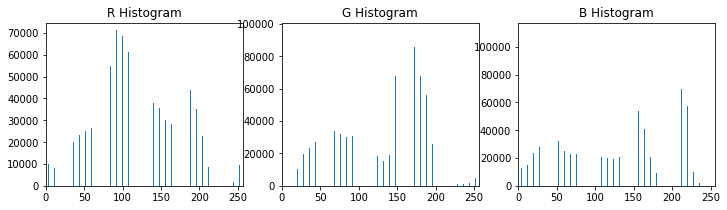

In [3]:
# Histogram of Colors
# When template matching does not work due to changes in
# - size
# - orientation
# - color (raw pixel intensity)
# We can try to use the histogram of colors 
# i.e histograms of pixel intensity (color histograms) as features.

'''
To construct a histogram from a continuous variable you first 
need to split the data into intervals, called bins. 
To construct a histogram, the first step is to "bin" 
the range of values — that is, divide the entire range of values 
into a series of intervals — and then count how many values fall 
into each interval. The bins are usually specified as consecutive, 
non-overlapping intervals of a variable.
NOTE: When the bins are evenly spaced (i.e., equally spaced bars)
then the height of the bar indicates the frequency; otherwise 
frequency can be determined by multiply the h and w of the bar
'''
# You can construct histograms of the R, G, and B channels like this

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

#image = mpimg.imread('cutouts/cutout1.jpg')

image = mpimg.imread('test_images/test1.jpg')

#Take histograms in R, G, and B
rhist = np.histogram(image[:,:,0], bins=32, range=(0,256))
ghist = np.histogram(image[:,:,1], bins=32, range=(0,256))
bhist = np.histogram(image[:,:,2], bins=32, range=(0,256))

# np.histogram() returns a tuple of two arrays. 
# In this case, for example, rhist[0] contains the counts in each 
# of the bins and rhist[1] contains the bin edges (so it is one 
# element longer than rhist[0]).

# To look at a plot of these results, we can compute the bin centers
# from the bin edges. Each of the histograms in this case have the 
# same bins, so we will just use the rhist bin edges
# Generating bin centers
bin_edges = rhist[1]
bin_centers = (bin_edges[1:] + bin_edges[0:len(bin_edges)-1])/2

# Plot a figure with all three bar charts
fig = plt.figure(figsize=(12,3))

plt.subplot(131)
plt.bar(bin_centers, rhist[0])
plt.xlim(0,256)
plt.title('R Histogram')
#plt.show()

plt.subplot(132)
plt.bar(bin_centers, ghist[0])
plt.xlim(0,256)
plt.title('G Histogram')
#plt.show()

plt.subplot(133)
plt.bar(bin_centers, bhist[0])
plt.xlim(0, 256)
plt.title('B Histogram')

plt.show()

# These, collectively, are now our feature vector for this 
# particular cutout image. We can concatenate them in the 
# following way

histo_features = np.concatenate((rhist[0], ghist[0], bhist[0]))


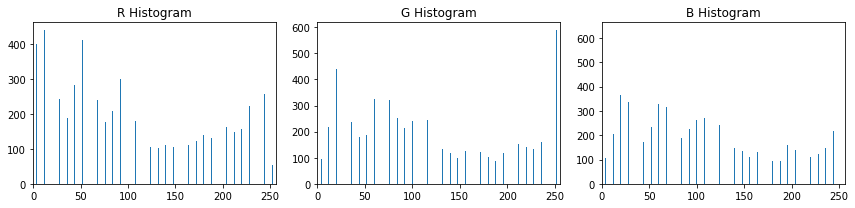

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('cutouts/cutout1.jpg')

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ghist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    bhist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:] + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features
    
rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()
    plt.show()
else:
    print('Your function is returning None for at least one variable...')

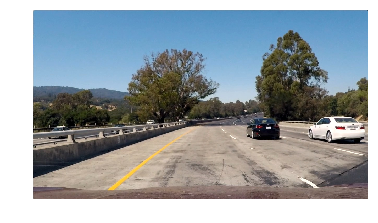

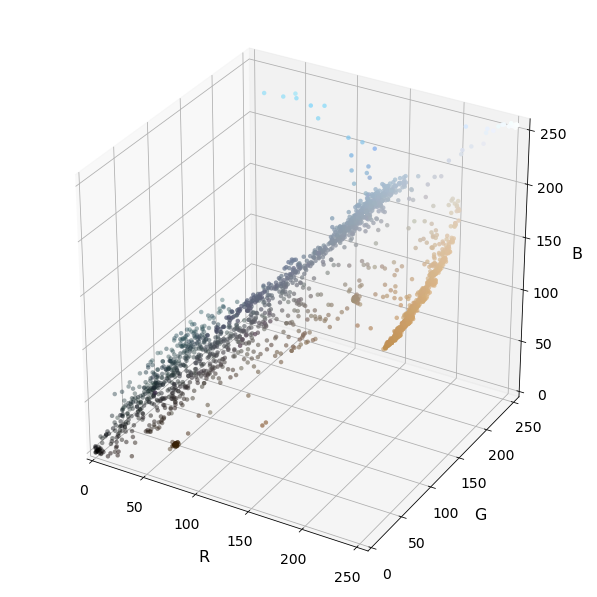

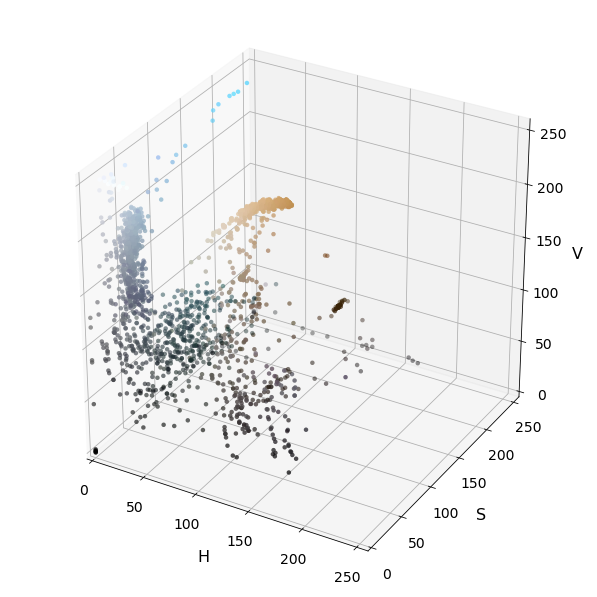

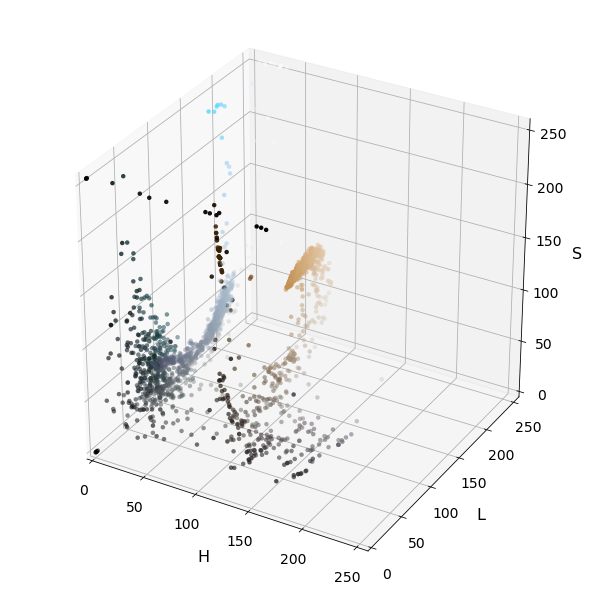

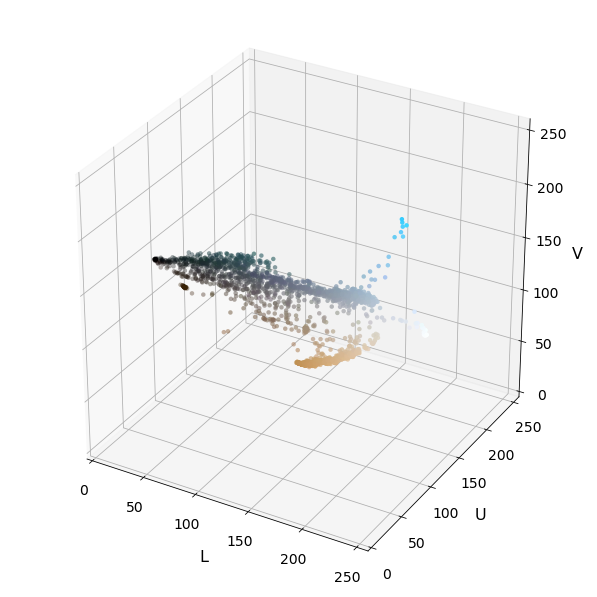

In [4]:
# COLOR SPACES
# Whether we use raw color directly or use raw pixel intensity 
# (histogram) we still have not solved the problem of classifying
# objects of the same class (say all cars) that can be of different color
# does not give us information about the actual color of the object
# We need to explore color spaces (like RGB, HSV, LUV)
# Color spaces is the distribution of color values in a image
# saturation value (over Hue and Lightness is useful)
# We can study the distribution of color values in an image 
# by plotting each pixel in some color space.
# You will notice that it is hard to distinguish between the class 
# of pixels you are interested in (vehicles, in this case) from 
# the background. So it may be more beneficial to plot pixels 
# from vehicle and non-vehicle images separately

#%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
    
#Function to Plot pixels in 3D
def plot3d(pixels, colors_rgb, axis_labels=list("RGB"), axis_limits=[(0,255),(0,255),(0,255)]):
    
    # Create figure and 3D axes
    fig = plt.figure(figsize=(8,8))
    ax = Axes3D(fig)
    
    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])
    
    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)
    
    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:,:,0].ravel(),
        pixels[:,:,1].ravel(),
        pixels[:,:,2].ravel(),
        c=colors_rgb.reshape((-1,3)),
        edgecolors='none')
    
    return ax # return Axed3D object for further manipulation

#img = cv2.imread("color_spaces/000528.png") #000528.png and 001240.png
img = cv2.imread("test_images/test1.jpg") #000528.png and 001240.png

#fig = plt.figure()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()
# Select a small fraction pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64 # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1]/scale), np.int(img.shape[0]/scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB) # OpenCV uses BGR, matplotlib uses RGB
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_RGB2HSV)
img_small_HLS = cv2.cvtColor(img_small, cv2.COLOR_RGB2HLS)
img_small_LUV = cv2.cvtColor(img_small, cv2.COLOR_RGB2LUV)
img_small_rgb = img_small_RGB / 255. # Scaled to [0,1], only for plotting

# Plot and Show
# Red Green and Blue
plot3d(img_small_RGB, img_small_rgb,axis_labels=list("RGB"))
plt.show()

# Hue Saturation Value (or HSB where B is Brightness)
plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()

# Hue Lightness Saturation
plot3d(img_small_HLS, img_small_rgb, axis_labels=list("HLS"))
plt.show()

# LUV
plot3d(img_small_LUV, img_small_rgb, axis_labels=list("LUV"))
plt.show()

In [5]:
# SPATIAL BINNING
'''
You saw earlier in the lesson that template matching is not a 
particularly robust method for finding vehicles unless you know 
exactly what your target object looks like. 
However, raw pixel values are still quite useful to include in 
your feature vector in searching for cars.

While it could be cumbersome to include three color channels of 
a full resolution image, you can perform spatial binning by resizing 
the image into a 32x32 or 64x64 pix image. Even resizing an image into
a 32x32 pix image still retains enough information to help in 
finding that object (say vehicle).

We can use OpenCV's cv2.resize() function.
'''

import cv2
import matplotlib.pyplot as plt

# Read and resize image
img = cv2.imread("test_images/test1.jpg")
small_img = cv2.resize(img, (32,32))
print(small_img.shape) # should get (32,32,3)

# Convert image to a one dimensial feature vector
feature_vec = small_img.ravel()
print(feature_vec.shape) # should get (3072,)

# 3072 is still quite a few features. 
# We should try to get to an even lower resolution.

(32, 32, 3)
(3072,)


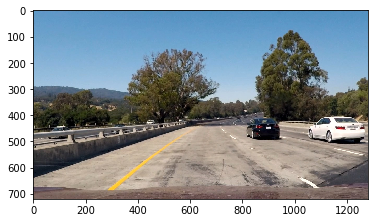

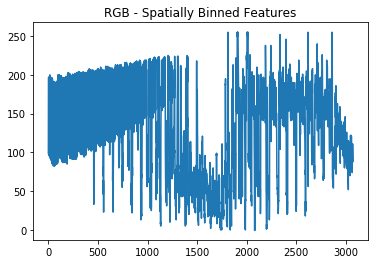

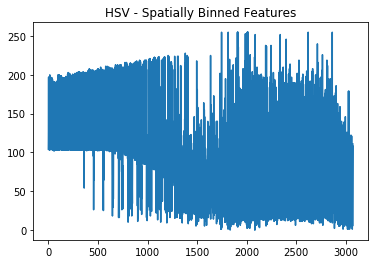

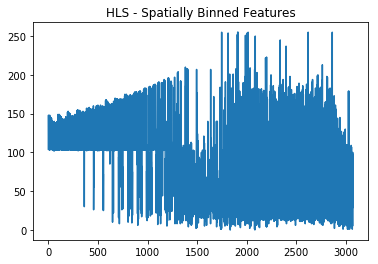

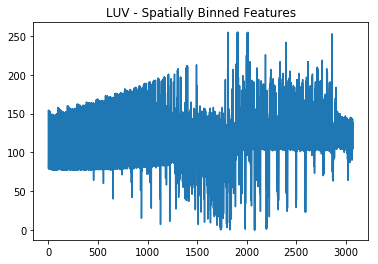

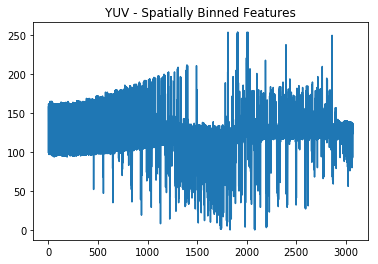

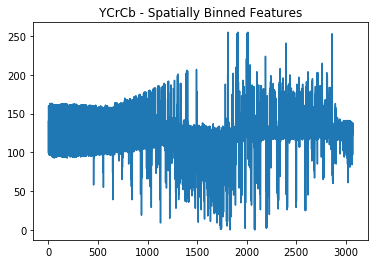

In [10]:
# Define a function that takes an image, a color space, 
# and a new image size and returns a feature vector
# to feed into a classifier
def bin_spatial(img, color_space='RGB', size=(32,32)):
    # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'HLS':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'LUV':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'YUV':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else:
        feature_img = np.copy(img)

    # Use cv2.resize() to resize the image
    feature_img_small = cv2.resize(feature_img, size)
    #print(feature_img_small.shape)
   
    # Use cv2.resize().ravel() to create the feature vector
    feature_vector = feature_img_small.ravel()
    #print(feature_vector.shape)
    
    # Return the feature vector
    return feature_vector

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the image
#image = mpimg.imread("test_images/test1.jpg")
image = cv2.imread("test_images/test1.jpg")

img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
    
feature_vec = bin_spatial(img, color_space="RGB", size=(32,32))
plt.plot(feature_vec)
plt.title("RGB - Spatially Binned Features")
plt.show()

feature_vec = bin_spatial(img, color_space="HSV", size=(32,32))
plt.plot(feature_vec)
plt.title("HSV - Spatially Binned Features")
plt.show()

feature_vec = bin_spatial(img, color_space="HLS", size=(32,32))
plt.plot(feature_vec)
plt.title("HLS - Spatially Binned Features")
plt.show()

feature_vec = bin_spatial(img, color_space="LUV", size=(32,32))
plt.plot(feature_vec)
plt.title("LUV - Spatially Binned Features")
plt.show()

feature_vec = bin_spatial(img, color_space="YUV", size=(32,32))
plt.plot(feature_vec)
plt.title("YUV - Spatially Binned Features")
plt.show()

feature_vec = bin_spatial(img, color_space="YCrCb", size=(32,32))
plt.plot(feature_vec)
plt.title("YCrCb - Spatially Binned Features")
plt.show()

In [13]:
# GRADIENTS

# - Raw pixel intensity gives Color and shape characteristics
# - Histogram of pixel intensity will give Color only characteristic
# - Gradients of pixel intensity will give Shape only characteristic

# The presence of gradients with specifici direction around a center
# may actually give us clue about the shape of the object 
# Converting an image to its gradient form and splitting it into a flat 1D array
# will give us the signature of that image (reading image from top to down)
# For example: 
# A triangle signature is - 90 - 150 - 30 210 270 330 
# A circle signature is 135 90 45 180 - 0 225 270 315

# BUT using the gradient value directly makes the gradient signature too sensitive
# This is where a Histogram Oriented Gradients (HOG) comes in handy

In [14]:
# Histogram Oriented Gradients (HOG)

# Is robust to variations in shape with many tweakable parameters
# Tweakable Parameters
# - # of orientation bins
# - grid of cells
# - cell sizes
# - adding overlap between cells
# - block normalization

The explore dataset function returned a count of 5966  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


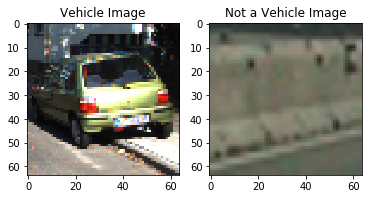

In [1]:
# DATA EXPLORATION
# Before we do any HOG processing, we must first explore the data

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import cv2


# Define a function to return some characteristics of the dataset 
# This function should take in two lists (car_list and notcar_list) and returns 
# a dictionary with the keys "n_cars", "n_notcars", "image_shape", and "data_type"
def explore_dataset(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    test_image = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = test_image.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = test_image.dtype
    # Return data_dict
    return data_dict

# car_notcar.py

images = glob.glob('datasets/vehicles_non_vehicles/*.png')
cars = []
notcars = []

for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)
        
data_info = explore_dataset(cars, notcars)

print('The explore dataset function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])


# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(car_image)
plt.title('Vehicle Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Not a Vehicle Image')
plt.show()


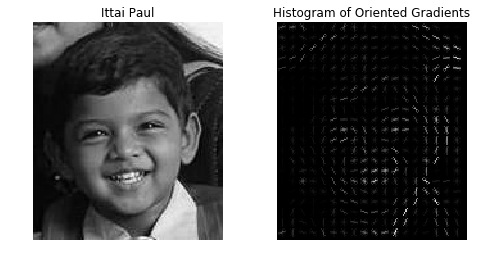

In [42]:
# HOG Features - Extraction from dataset using sckit-image
# Tutorial
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from skimage.feature import hog
#from skimage import data, color, exposure

pix_per_cell = 8
cell_per_block = 2
orientation_bins = 9

img = mpimg.imread("ittai_paul_face.jpeg")
#img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print(gray_img.shape)
cv2.imwrite('ittai_paul_gray.jpeg', gray_img)

#img = cv2.imread("ittai_paul_gray.jpg")

features, hog_image = hog(gray_img, orientations=orientation_bins,
                          pixels_per_cell=(pix_per_cell, pix_per_cell),
                          cells_per_block=(cell_per_block, cell_per_block),
                          visualise=True, feature_vector=True)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(gray_img, cmap=plt.cm.gray)
ax1.set_title('Ittai Paul')
ax1.set_adjustable('box-forced')

# Rescale histogram for better display
#hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,0.02))

ax2.axis('off')
ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax2.set_adjustable('box-forced')

plt.show()


In [99]:
def plot_vehicle_image_and_HOG(image, title_text):
    gray_vehicle_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Define HOG parameters
    orient = 8
    pix_per_cell = 8
    cell_per_block = 1
    blk_norm = "L2-Hys"

    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(gray_vehicle_image, orient, 
                            pix_per_cell, cell_per_block, 
                            vis=True, feature_vec=False, 
                            block_norm="L2-Hys")
    
    # Plot the examples
    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title(title_text)
    plt.subplot(122)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Visualization')
    plt.show()

In [100]:
def plot_not_vehicle_image_and_HOG(image, title_text):
    gray_not_vehicle_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Define HOG parameters
    orient = 8
    pix_per_cell = 8
    cell_per_block = 1
    blk_norm = "L2-Hys"

    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(gray_not_vehicle_image, orient, 
                            pix_per_cell, cell_per_block, 
                            vis=True, feature_vec=False, 
                            block_norm="L2-Hys")
    
    # Plot the examples
    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title(title_text)
    plt.subplot(122)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Visualization')
    plt.show()

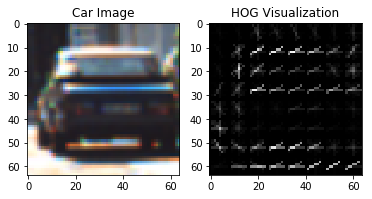

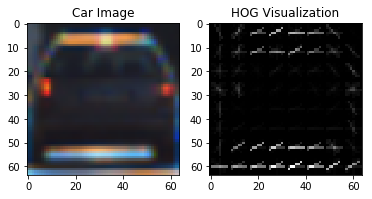

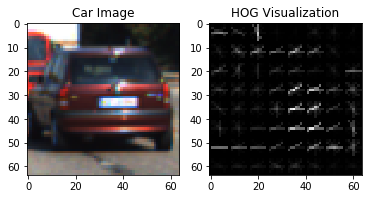

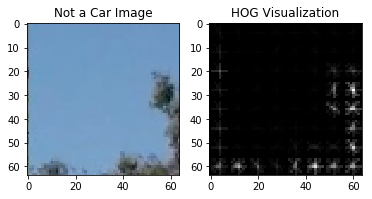

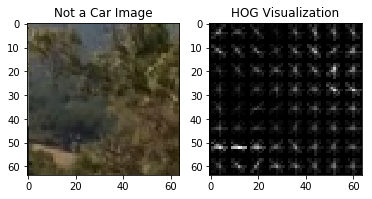

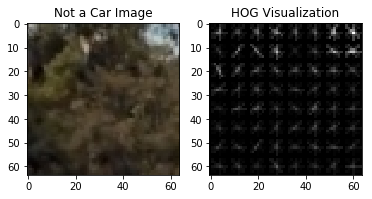

In [104]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import glob
from skimage.feature import hog

def get_hog_features(gray_img, orient=9, 
                     pix_per_cell=8, cell_per_block=2, 
                     vis=False, feature_vec=True,
                     block_norm="L2-Hys"):
    #img should be gray image or single channel image
    #gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    if vis == True:
        #print(gray_img.shape)
        features, hog_image = hog(gray_img, orientations=orient,
                          pixels_per_cell=(pix_per_cell, pix_per_cell),
                          cells_per_block=(cell_per_block, cell_per_block),
                          visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        # Use skimage.hog() to get features only
        features = hog(gray_img, orientations=orient,
                          pixels_per_cell=(pix_per_cell, pix_per_cell),
                          cells_per_block=(cell_per_block, cell_per_block),
                          visualise=False, feature_vector=True)
        return features
    
images = glob.glob('datasets/vehicles_non_vehicles/*.png')
cars = []
notcars = []

for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)

# Reduce the sample size because HOG features are slow to compute
sample_size = 3
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

# Generate a random index to look at a car image
#ind = np.random.randint(0, len(cars))

# Read in the image
vehicle_counter = 0
while vehicle_counter < sample_size:
    vehicle_image = mpimg.imread(cars[vehicle_counter])
    plot_vehicle_image_and_HOG(vehicle_image, 'Car Image')
    vehicle_counter = vehicle_counter + 1

not_vehicle_counter = 0
while not_vehicle_counter < sample_size:
    not_vehicle_image = mpimg.imread(notcars[not_vehicle_counter])
    plot_not_vehicle_image_and_HOG(not_vehicle_image, 'Not a Car Image')
    not_vehicle_counter = not_vehicle_counter + 1    

In [18]:
# Combining color and shape type based features
# to design a more robust detection system
# e.g., HSV and HOG
# Make sure to normalize so one type does not dominate the other
# We could also use a decision tree classifier to drop one type of
# feature that is not contributing much

In [19]:
# NORMALIZATION
# Now that we have several feature extraction methods
# Next step is to normalize the data before feeding it to a classifier
# Data Exploration -> Extract Features ( Color Spaces (bin_spatial, color_hist) / Gradients ) 
# -> Normalization
# We can used sklearn's StandardScaler() method for normalization which
# standardizes features by removing the mean (making mean 0) and scaling to unit variance
# If your data contains many outliers, scaling using the mean and 
# variance of the data is likely to not work very well. In these 
# cases, you can use robust_scale and RobustScaler as drop-in 
# replacements instead. They use more robust estimates for the 
# center and range of your data.

import numpy as np
feature_list = [feature_vec1, feature_vec2]

# Create an array stack. NOTE: StandardScaler() expects np.float64
X = n.vstack(feature_list).astype(np.float64)

# You can then fit a scaler to X and scale it as follows

from sklearn.preprocessing import StandardScaler
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

NameError: name 'feature_vec1' is not defined

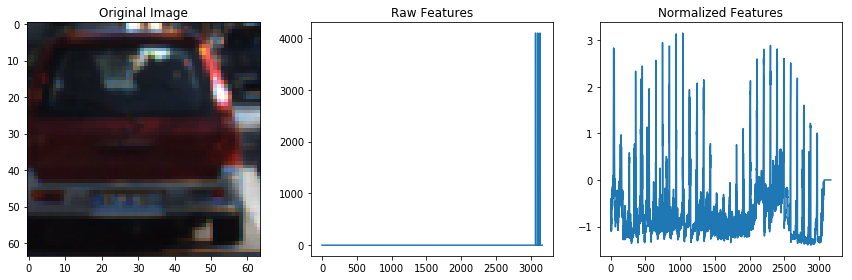

In [20]:
##### 
# Your goal in this exercise is to write a function that takes 
# in a list of image filenames, reads them one by one, then applies 
# a color conversion (if necessary) and uses bin_spatial() and 
# color_hist() to generate feature vectors. 
# Your function should then concatenate those two feature vectors 
# and append the result to a list. After cycling through all the 
# images, your function should return the list of feature vectors.
#####

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
import glob

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', spatial_size=(32,32),
                    hist_bins=32, hist_range=(0,256)):
    # Create a list to append feature vectors to
    features_list = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # Apply color conversion if other than 'RGB'
        feature_img = get_image_in_correct_color(image, color_space=cspace)
        # Apply bin_spatial() to get spatial color features
        spatial_features = bin_spatial(feature_img, size=spatial_size)
        # Apply color_hist() to get color histogram features
        hist_features = color_hist(feature_img, nbins=hist_bins, bins_range=hist_range)
        # Append the new feature vector to the features list
        features_list.append(np.concatenate((spatial_features, hist_features)))
    # Return list of features vectors
    return features_list

def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ghist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    bhist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    ## Generating bin centers
    #bin_edges = rhist[1]
    #bin_centers = (bin_edges[1:] + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    #return rhist, ghist, bhist, bin_centers, hist_features
    return hist_features

def get_image_in_correct_color(img, color_space='RGB'):
     # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'HLS':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'LUV':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'YUV':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else:
        feature_img = np.copy(img)
        
    return feature_img

def bin_spatial(img, size=(32,32)):
    # Use cv2.resize() to resize the image
    feature_img_small = cv2.resize(img, size)
    #print(feature_img_small.shape)
   
    # Use cv2.resize().ravel() to create the feature vector
    feature_vector = feature_img_small.ravel()
    #print(feature_vector.shape)
    
    # Return the feature vector
    return feature_vector

def get_hog_features(gray_img, orient=9, 
                     pix_per_cell=8, cell_per_block=2, 
                     vis=False, feature_vec=True,
                     block_norm="L2-Hys"):
    #img should be gray image or single channel image
    #gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    if vis == True:
        #print(gray_img.shape)
        features, hog_image = hog(gray_img, orientations=orient,
                          pixels_per_cell=(pix_per_cell, pix_per_cell),
                          cells_per_block=(cell_per_block, cell_per_block),
                          visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        # Use skimage.hog() to get features only
        features = hog(gray_img, orientations=orient,
                          pixels_per_cell=(pix_per_cell, pix_per_cell),
                          cells_per_block=(cell_per_block, cell_per_block),
                          visualise=False, feature_vector=True)
        return features

images = glob.glob('datasets/vehicles_non_vehicles/*.png')
cars = []
notcars = []

for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)

car_features = extract_features(cars, cspace='RGB', spatial_size=(32,32),
                               hist_bins=32, hist_range=(0,256))
notcar_features = extract_features(notcars, cspace='RGB', spatial_size=(32,32),
                                  hist_bins=32, hist_range=(0,256))

if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    
    car_ind = np.random.randint(0, len(cars))
    
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
    plt.show()
else:
    print('The extract features function only returned empty feature vectors.')
    

In [21]:
# CLASSIFICATION
# Once we can extract features and normalized them
# we can move on to Classification

# Data Exploration -> Extract Features ( Color Spaces (bin_spatial, color_hist) / Gradients ) 
# -> Normalization -> Classification (1. Using Color 2. Using HOG)

# For classification to work properly, we need LABELED DATA
# in our case - car and not_car are the two classes we need our
# images to be classified into car and not_car
# So we need samples of car and not_car images
# If you only have video frames available, we will need to crop 
# off regions and scale them to a fixed size
# Ideally we need a balanced dataset - that is have similar number of
# car and not_car images
# Techniques to balance dataset include
# - duplicate images from the smaller dataset 

# CLASSIFICATION STEPS
# Step 1 - Dataset Preparation
# Step 2 - Split and Shuffle the dataset into training set and test set;
# To avoid any ordering we should SHUFFLE the training and test set randomly
# ALSO make sure that the training and test sets are both BALANCED

'''
CLASSIFICATION STEPS and PURPOSE
Step: Prepare a balanced dataset, i.e., have as many positive as negative examples, or in the case of multi-class problems, roughly the same number of cases of each class.
Purpose: To avoid having your algorithm simply classify everything as belonging to the majority class.

Step: Random Shuffling of the data
Purpose: To avoid problems due to ordering of the data

Step: Splitting the data into a training and testing set
Purpose: To avoid overfitting / improve generalization

Step: Normalization of features, typically to zero mean and unit variance
Purpose To avoid individual features or sets of features dominating the response of your classifier
'''
# Step 3 - Train the classifier
# Training a classifier involves
# Extracting Features from each of thr the images and 
# pass the features (features vector) along with the labels 
# and the images into the training algorithm as parameters
# The training algorithm initializes a model which accepts
# the parameters and classifies the images using the features 
# vectors and labels. This is an iterative process where the 
# classifier is trained and to classify the images into appropriate
# classes. During training, errors of misclassification (classifying a 
# car as not a car or vice versa) can occur. When these errors fall
# under a certain threshold, then you can say that the model has been
# adequately trained. Reducing the error (false positives per window)
# can be accomplished by tuning the parameters that impact the classifier
# These parameters include C with Linear Kernel 
# and Gamma and C for non-linear kernel
# Then the trained model is used
# to predict classes of new dataset images (or the test set) to verify 
# how well it performs. 
# What classifier should we use?
# SVM is good to work with HOG features
# Can be something else like Naives Bayes or Decision Trees or a combination 

'\nCLASSIFICATION STEPS and PURPOSE\nStep: Prepare a balanced dataset, i.e., have as many positive as negative examples, or in the case of multi-class problems, roughly the same number of cases of each class.\nPurpose: To avoid having your algorithm simply classify everything as belonging to the majority class.\n\nStep: Random Shuffling of the data\nPurpose: To avoid problems due to ordering of the data\n\nStep: Splitting the data into a training and testing set\nPurpose: To avoid overfitting / improve generalization\n\nStep: Normalization of features, typically to zero mean and unit variance\nPurpose To avoid individual features or sets of features dominating the response of your classifier\n'

In [22]:
# CLASSIFICATION USING COLOR

# Now we'll try training a classifier on our dataset. 
# First, we'll see how well it does just using spatially binned color and color histograms.
# To do this, we'll use the functions you defined in previous exercises, 
# namely, bin_spatial(), color_hist(), and extract_features(). 
# We'll then read in our car and non-car images, extract the color features for each, 
# and scale the feature vectors to zero mean and unit variance.

# Our labels vector (labels_vec) in this case will just be a binary vector indicating whether 
# each feature vector in our dataset corresponds to a car or non-car (1's for cars, 0's for non-cars). 
# Given lists of car and non-car features (the output of extract_features()) 
# we can define a labels vector like this:

import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
# NOTE: the next import is only valid 
# for scikit-learn version <= 0.17
from sklearn.cross_validation import train_test_split
# if using scikit-learn >= 0.18
# from sklearn.model_selection import train_test_split


# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', spatial_size=(32,32),
                    hist_bins=32, hist_range=(0,256)):
    # Create a list to append feature vectors to
    features_list = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # Apply color conversion if other than 'RGB'
        feature_img = get_image_in_correct_color(image, color_space=cspace)
        # Apply bin_spatial() to get spatial color features
        spatial_features = bin_spatial(feature_img, size=spatial_size)
        # Apply color_hist() to get color histogram features
        hist_features = color_hist(feature_img, nbins=hist_bins, bins_range=hist_range)
        # Append the new feature vector to the features list
        features_list.append(np.concatenate((spatial_features, hist_features)))
    # Return list of features vectors
    return features_list

def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ghist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    bhist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    ## Generating bin centers
    #bin_edges = rhist[1]
    #bin_centers = (bin_edges[1:] + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    #return rhist, ghist, bhist, bin_centers, hist_features
    return hist_features

def get_image_in_correct_color(img, color_space='RGB'):
     # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'HLS':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'LUV':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'YUV':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else:
        feature_img = np.copy(img)
        
    return feature_img

def bin_spatial(img, size=(32,32)):
    # Use cv2.resize() to resize the image
    feature_img_small = cv2.resize(img, size)
    #print(feature_img_small.shape)
   
    # Use cv2.resize().ravel() to create the feature vector
    feature_vector = feature_img_small.ravel()
    #print(feature_vector.shape)
    
    # Return the feature vector
    return feature_vector

def get_hog_features(gray_img, orient=9, 
                     pix_per_cell=8, cell_per_block=2, 
                     vis=False, feature_vec=True,
                     block_norm="L2-Hys"):
    #img should be gray image or single channel image
    #gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    if vis == True:
        #print(gray_img.shape)
        features, hog_image = hog(gray_img, orientations=orient,
                          pixels_per_cell=(pix_per_cell, pix_per_cell),
                          cells_per_block=(cell_per_block, cell_per_block),
                          visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        # Use skimage.hog() to get features only
        features = hog(gray_img, orientations=orient,
                          pixels_per_cell=(pix_per_cell, pix_per_cell),
                          cells_per_block=(cell_per_block, cell_per_block),
                          visualise=False, feature_vector=True)
        return features

images = glob.glob('datasets/vehicles_non_vehicles/*.png')
cars = []
notcars = []

for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)

# TODO play with these values to see how your classifier
# performs under different binning scenarios
spatial = 16
histbins = 32

car_features = extract_features(cars, cspace='RGB', spatial_size=(spatial,spatial),
                               hist_bins=histbins, hist_range=(0,256))
notcar_features = extract_features(notcars, cspace='RGB', spatial_size=(spatial,spatial),
                                  hist_bins=histbins, hist_range=(0,256))

# Next we will stack and scale our features vectors
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector based on features lists
labels_vec = np.hstack((np.ones(len(car_features)),
                       np.zeros(len(notcar_features))))

# Split the dataset into training and test datasets
# NOTE: train_test_split() performs both 
# the shuffle and split of the data
rand_state = np.random.randint(0,100)
X_train, X_test, y_train, y_test =  train_test_split(
    scaled_X, labels_vec, test_size=0.2, random_state = rand_state)

# Now, you're ready to define and train a classifier! 
# Here we'll try a Linear Support Vector Machine. 
print('Using spatial binning of:', spatial,
     'and', histbins, 'histogram bins')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC (Support Vector Classifer)
svc = LinearSVC()
# Check the training time for the SVC
start_time = time.time()
svc.fit(X_train, y_train)
end_time = time.time()
print(round(end_time-start_time, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
start_time = time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
end_time = time.time()
print(round(end_time - start_time, 5), 'Seconds to predict', n_predict,'labels with SVC')

//anaconda/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Using spatial binning of: 16 and 32 histogram bins
Feature vector length: 864
4.97 Seconds to train SVC...
Test Accuracy of SVC =  0.9568
My SVC predicts:  [ 0.  0.  0.  1.  0.  1.  0.  0.  0.  1.]
For these 10 labels:  [ 0.  0.  0.  1.  0.  1.  0.  0.  0.  1.]
0.00151 Seconds to predict 10 labels with SVC


In [23]:
'''
Using spatial binning of: 32 and 32 histogram bins
Feature vector length: 3168
11.61 Seconds to train SVC...
Test Accuracy of SVC =  0.9608
My SVC predicts:  [ 0.  1.  0.  0.  0.  0.  0.  1.  0.  0.]
For these 10 labels:  [ 0.  1.  0.  0.  0.  0.  0.  1.  0.  0.]
0.00172 Seconds to predict 10 labels with SVC

Using spatial binning of: 16 and 32 histogram bins
Feature vector length: 864
5.76 Seconds to train SVC...
Test Accuracy of SVC =  0.9662
My SVC predicts:  [ 1.  1.  1.  0.  0.  0.  0.  1.  0.  0.]
For these 10 labels:  [ 1.  1.  1.  0.  0.  0.  0.  1.  0.  0.]
0.00172 Seconds to predict 10 labels with SVC

Using spatial binning of: 16 and 16 histogram bins
Feature vector length: 816
4.37 Seconds to train SVC...
Test Accuracy of SVC =  0.9508
My SVC predicts:  [ 0.  0.  1.  0.  0.  0.  1.  0.  1.  0.]
For these 10 labels:  [ 0.  0.  1.  0.  0.  0.  1.  0.  1.  0.]
0.00172 Seconds to predict 10 labels with SVC

Using spatial binning of: 32 and 16 histogram bins
Feature vector length: 3120
11.49 Seconds to train SVC...
Test Accuracy of SVC =  0.9565
My SVC predicts:  [ 0.  0.  1.  0.  1.  0.  1.  0.  0.  1.]
For these 10 labels:  [ 0.  0.  1.  1.  1.  0.  1.  0.  0.  1.]
0.00172 Seconds to predict 10 labels with SVC

Using spatial binning of: 64 and 64 histogram bins
Feature vector length: 12480
60.28 Seconds to train SVC...
Test Accuracy of SVC =  0.9652
My SVC predicts:  [ 0.  1.  0.  1.  0.  0.  1.  1.  0.  0.]
For these 10 labels:  [ 0.  1.  0.  1.  0.  0.  1.  1.  0.  0.]
0.00172 Seconds to predict 10 labels with SVC

Using spatial binning of: 16 and 64 histogram bins
Feature vector length: 960
4.99 Seconds to train SVC...
Test Accuracy of SVC =  0.9592
My SVC predicts:  [ 1.  0.  0.  0.  1.  1.  0.  1.  0.  1.]
For these 10 labels:  [ 1.  1.  0.  0.  1.  1.  0.  1.  0.  1.]
0.00172 Seconds to predict 10 labels with SVC

Using spatial binning of: 8 and 64 histogram bins
Feature vector length: 384
3.58 Seconds to train SVC...
Test Accuracy of SVC =  0.9347
My SVC predicts:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
For these 10 labels:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
0.00172 Seconds to predict 10 labels with SVC

Using spatial binning of: 24 and 64 histogram bins
Feature vector length: 1920
6.35 Seconds to train SVC...
Test Accuracy of SVC =  0.9598
My SVC predicts:  [ 1.  0.  1.  1.  1.  0.  0.  1.  1.  0.]
For these 10 labels:  [ 1.  0.  1.  1.  1.  0.  0.  1.  1.  0.]
0.00172 Seconds to predict 10 labels with SVC

Using spatial binning of: 24 and 32 histogram bins
Feature vector length: 1824
7.37 Seconds to train SVC...
Test Accuracy of SVC =  0.9528
My SVC predicts:  [ 1.  0.  1.  1.  0.  0.  1.  1.  1.  0.]
For these 10 labels:  [ 1.  0.  1.  1.  0.  1.  1.  1.  1.  0.]
0.00172 Seconds to predict 10 labels with SVC

Using spatial binning of: 24 and 32 histogram bins
Feature vector length: 1824
6.95 Seconds to train SVC...
Test Accuracy of SVC =  0.9622
My SVC predicts:  [ 1.  0.  0.  0.  1.  1.  0.  1.  0.  1.]
For these 10 labels:  [ 1.  1.  0.  0.  1.  1.  0.  1.  0.  1.]
0.00172 Seconds to predict 10 labels with SVC
'''

'\nUsing spatial binning of: 32 and 32 histogram bins\nFeature vector length: 3168\n11.61 Seconds to train SVC...\nTest Accuracy of SVC =  0.9608\nMy SVC predicts:  [ 0.  1.  0.  0.  0.  0.  0.  1.  0.  0.]\nFor these 10 labels:  [ 0.  1.  0.  0.  0.  0.  0.  1.  0.  0.]\n0.00172 Seconds to predict 10 labels with SVC\n\nUsing spatial binning of: 16 and 32 histogram bins\nFeature vector length: 864\n5.76 Seconds to train SVC...\nTest Accuracy of SVC =  0.9662\nMy SVC predicts:  [ 1.  1.  1.  0.  0.  0.  0.  1.  0.  0.]\nFor these 10 labels:  [ 1.  1.  1.  0.  0.  0.  0.  1.  0.  0.]\n0.00172 Seconds to predict 10 labels with SVC\n\nUsing spatial binning of: 16 and 16 histogram bins\nFeature vector length: 816\n4.37 Seconds to train SVC...\nTest Accuracy of SVC =  0.9508\nMy SVC predicts:  [ 0.  0.  1.  0.  0.  0.  1.  0.  1.  0.]\nFor these 10 labels:  [ 0.  0.  1.  0.  0.  0.  1.  0.  1.  0.]\n0.00172 Seconds to predict 10 labels with SVC\n\nUsing spatial binning of: 32 and 16 histogra

In [24]:
# CLASSIFICATION USING HOG

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

def get_image_in_correct_color(img, color_space='RGB'):
     # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'HLS':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'LUV':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'YUV':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else:
        feature_img = np.copy(img)
        
    return feature_img

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # Apply color conversion if other than 'RGB'
        feature_image = get_image_in_correct_color(image, color_space=cspace)
        
        # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        # Append the new feature vector to the features list
        features.append(hog_features)
    # Return list of feature vectors
    return features


# Divide up into cars and notcars
images = glob.glob('datasets/vehicles_non_vehicles/*.png')
cars = []
notcars = []
for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)

# Reduce the sample size because HOG features are slow to compute
sample_size = 500
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

### TODO: Tweak these parameters and see how the results change.
colorspace = 'HSV' # Can be RGB, HSV, HLS, LUV, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"

t=time.time()
car_features = extract_features(cars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
notcar_features = extract_features(notcars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
t2 = time.time()

# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:', colorspace, 'color space with', orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block and', hog_channel, 'HOG channel')
print(round(t2-t, 2), 'Seconds to extract HOG features...')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

Using: HSV color space with 9 orientations 8 pixels per cell and 2 cells per block and ALL HOG channel
3.21 Seconds to extract HOG features...
Feature vector length: 5292
0.11 Seconds to train SVC...
Test Accuracy of SVC =  1.0
My SVC predicts:  [ 0.  0.  1.  0.  1.  1.  1.  1.  0.  1.]
For these 10 labels:  [ 0.  0.  1.  0.  1.  1.  1.  1.  0.  1.]
0.00133 Seconds to predict 10 labels with SVC


In [25]:
'''
####
Changing Colorspace ()
####
Using: RGB color space with 9 orientations 8 pixels per cell and 2 cells per block
1.24 Seconds to extract HOG features...
Feature vector length: 1764
0.04 Seconds to train SVC...
Test Accuracy of SVC =  0.985
My SVC predicts:  [ 0.  1.  1.  0.  1.  1.  1.  1.  1.  1.]
For these 10 labels:  [ 0.  1.  1.  0.  1.  1.  1.  1.  1.  1.]
0.00145 Seconds to predict 10 labels with SVC

Using: HSV color space with 9 orientations 8 pixels per cell and 2 cells per block
1.29 Seconds to extract HOG features...
Feature vector length: 1764
0.04 Seconds to train SVC...
Test Accuracy of SVC =  0.99
My SVC predicts:  [ 1.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
For these 10 labels:  [ 1.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
0.00175 Seconds to predict 10 labels with SVC

Using: HLS color space with 9 orientations 8 pixels per cell and 2 cells per block
1.29 Seconds to extract HOG features...
Feature vector length: 1764
0.04 Seconds to train SVC...
Test Accuracy of SVC =  0.995
My SVC predicts:  [ 0.  0.  1.  0.  1.  1.  1.  1.  0.  1.]
For these 10 labels:  [ 0.  0.  1.  0.  1.  1.  1.  1.  0.  1.]
0.00147 Seconds to predict 10 labels with SVC

Using: LUV color space with 9 orientations 8 pixels per cell and 2 cells per block
1.33 Seconds to extract HOG features...
Feature vector length: 1764
0.04 Seconds to train SVC...
Test Accuracy of SVC =  0.995
My SVC predicts:  [ 0.  0.  0.  1.  1.  0.  0.  0.  0.  1.]
For these 10 labels:  [ 0.  0.  0.  1.  1.  0.  0.  0.  0.  1.]
0.00143 Seconds to predict 10 labels with SVC

Using: YUV color space with 9 orientations 8 pixels per cell and 2 cells per block
1.26 Seconds to extract HOG features...
Feature vector length: 1764
0.06 Seconds to train SVC...
Test Accuracy of SVC =  0.99
My SVC predicts:  [ 1.  0.  1.  0.  1.  1.  1.  1.  0.  0.]
For these 10 labels:  [ 1.  0.  1.  0.  1.  1.  1.  1.  0.  0.]
0.00156 Seconds to predict 10 labels with SVC

Using: YCrCb color space with 9 orientations 8 pixels per cell and 2 cells per block
1.24 Seconds to extract HOG features...
Feature vector length: 1764
0.04 Seconds to train SVC...
Test Accuracy of SVC =  0.995
My SVC predicts:  [ 1.  1.  1.  1.  1.  0.  0.  1.  1.  0.]
For these 10 labels:  [ 1.  1.  1.  1.  1.  0.  0.  1.  1.  0.]
0.00156 Seconds to predict 10 labels with SVC
'''

'''
Using: HSV color space with 9 orientations 8 pixels per cell and 2 cells per block and ALL HOG channel
2.95 Seconds to extract HOG features...
Feature vector length: 5292
0.12 Seconds to train SVC...
Test Accuracy of SVC =  1.0
My SVC predicts:  [ 1.  0.  0.  1.  0.  0.  0.  1.  0.  1.]
For these 10 labels:  [ 1.  0.  0.  1.  0.  0.  0.  1.  0.  1.]
0.00153 Seconds to predict 10 labels with SVC
'''

'\nUsing: HSV color space with 9 orientations 8 pixels per cell and 2 cells per block and ALL HOG channel\n2.95 Seconds to extract HOG features...\nFeature vector length: 5292\n0.12 Seconds to train SVC...\nTest Accuracy of SVC =  1.0\nMy SVC predicts:  [ 1.  0.  0.  1.  0.  0.  0.  1.  0.  1.]\nFor these 10 labels:  [ 1.  0.  0.  1.  0.  0.  0.  1.  0.  1.]\n0.00153 Seconds to predict 10 labels with SVC\n'

In [27]:
# TUNING THE CLASSIFIER

# Successfully tuning your algorithm involves SEARCHING for a kernel, 
# a gamma value and a C value that minimize prediction error. 
# To tune your SVM vehicle detection model, you can use one of 
# scikit-learn's parameter tuning algorithms.
# When tuning SVM, remember that you can only tune the C parameter 
# with a linear kernel. 
# For a non-linear kernel, you can tune C and gamma.

# Tuning steps:
# 4.1 - Searching for a Kernel (linear or non-linear)
# 4.2 - Tuning C parameter for Linear kernels
# 4.3 - Tuning C and Gamma parameter for non-linear kernels

# Step 4.1 - Searching for a Kernel
# Scikit-learn includes two algorithms for carrying out an 
# automatic parameter search:
# - GridSearchCV
# - RandomizedSearchCV

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1,10]}
svr = svm.SVC()
clf = GridSearchCV(svr, parameters)
clf.fit(iris.data, iris.target)
#sorted(clf.cv_results_.keys())
sorted(clf.cv_results_)

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [28]:
#from __future__ import print_function
#print(__doc__)

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    #print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

# Tuning hyper-parameters for precision
Best parameters set found on development set:

{'kernel': 'rbf', 'C': 10, 'gamma': 0.001}

Grid scores on development set:

0.986 (+/-0.016) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.959 (+/-0.029) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.988 (+/-0.017) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.982 (+/-0.026) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.988 (+/-0.017) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.982 (+/-0.025) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.988 (+/-0.017) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
0.982 (+/-0.025) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}
0.975 (+/-0.014) for {'kernel': 'linear', 'C': 1}
0.975 (+/-0.014) for {'kernel': 'linear', 'C': 10}
0.975 (+/-0.014) for {'kernel': 'linear', 'C': 100}
0.975 (+/-0.014) for {'kernel': 'linear', 'C': 1000}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on

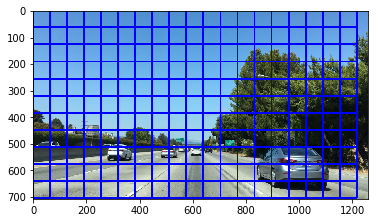

In [29]:
# FINDING OBJECTS (VEHICLES) IN AN IMAGE

# Data Exploration -> Extract Features ( Color Spaces (bin_spatial, color_hist) / Gradients ) 
# -> Normalization -> Classification -> Object Detection 

# Finding Objects in an image using SLIDING WINDOWS

# To implement a sliding window search, you need to decide what size 
# window you want to search, where in the image you want to start and 
# stop your search, and how much you want windows to overlap.
# A 256x256 (h * w) image with a sliding window of 128x128 (sw_size) and 
# 50% (o) overlap will have 9 windows 
# ((h / (sw_size * o)) - 1) * ((w / (sw_size * o)) - 1)
# = ((256 / (128 * 0.5)) - 1) * ((256 / (128 * 0.5)) - 1)
# = ((256 / 64) - 1) * ((256 / 64) - 1)
# = (4-1) * (4-1)
# = (3)*(3)

# How many windows would you be searching for if 
# image size = 1280 x 960 with 64x64 sliding window size with 50% overlap
# (1280/(64 * 0.5) - 1) * (960 /(64*.5)-1)
# ((1280/32) - 1) * ((960/32)-1)
# (40-1)*(30-1)
# = 1131 windows

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('bbox-example-image.jpg')

# Draw Bounding Boxes
def draw_boxes(img, bboxes, color=(255, 0, 255), thick=6):
    # make a copy of the image
    draw_img = np.copy(img)
    # draw each bounding box on your image copy 
    # using cv2.rectangle()
    for each_bbox in bboxes:
        cv2.rectangle(draw_img, each_bbox[0], each_bbox[1], color, thick)
    # return the image copy with boxes drawn
    return draw_img # Change this line to return image copy with boxes

# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, 
                 x_start_stop=[None, None], 
                 y_start_stop=[None, None],
                 xy_window=(64,64),
                 xy_overlap=(0.5,0.5)):
    
    # If x and/or y start/stop positions are not defined
    # set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    #print(x_start_stop[0],x_start_stop[1])
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]    
    #print(y_start_stop[0],y_start_stop[1])
    
    # Compute the span of the region to be searched
    
    x_span = x_start_stop[1] - x_start_stop[0]
    y_span = y_start_stop[1] - y_start_stop[0]
    
    # Compute the number of pixels per step in x/y
    n_x_pix_per_step = np.int(xy_window[0] * (1 - xy_overlap[0]))
    n_y_pix_per_step = np.int(xy_window[1] * (1 - xy_overlap[1]))
    
    # Compute the number of windows in x/y
    n_x_buffer = np.int(xy_window[0] * (xy_overlap[0]))
    n_y_buffer = np.int(xy_window[1] * (xy_overlap[1]))
    n_x_windows = np.int((x_span - n_x_buffer)/ n_x_pix_per_step)
    n_y_windows = np.int((y_span - n_y_buffer)/ n_y_pix_per_step)
    
    # Initialize a list to append window position to
    window_list = []
    
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(n_y_windows):
        for xs in range(n_x_windows):
            # Calculate each window position
            start_x = xs * n_x_pix_per_step + x_start_stop[0]
            end_x = start_x + xy_window[0]
            start_y = ys* n_y_pix_per_step + y_start_stop[0]
            end_y = start_y + xy_window[1]
            # Append window position to list
            window_list.append(((start_x, start_y), (end_x, end_y)))
    
    # Return the list of windows
    return window_list

windows = slide_window(image, x_start_stop=[None, None],
                       y_start_stop=[None, None],
                       xy_window=(128,128),
                       xy_overlap=(0.5,0.5))

window_img = draw_boxes(image, windows, color=(0,0,255), thick=6)
plt.imshow(window_img)
plt.show()                       

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 5292
0.13 Seconds to train SVC...
Test Accuracy of SVC =  0.985


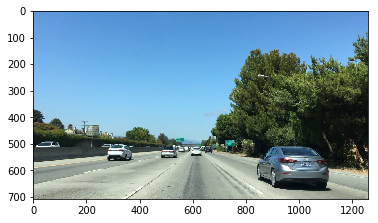

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ghist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    bhist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    ## Generating bin centers
    #bin_edges = rhist[1]
    #bin_centers = (bin_edges[1:] + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    #return rhist, ghist, bhist, bin_centers, hist_features
    return hist_features

def get_image_in_correct_color(img, color_space='RGB'):
     # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'HLS':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'LUV':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'YUV':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else:
        feature_img = np.copy(img)
    return feature_img

def bin_spatial(img, size=(32,32)):
    # Use cv2.resize() to resize the image
    feature_img_small = cv2.resize(img, size)
    #print(feature_img_small.shape)
   
    # Use cv2.resize().ravel() to create the feature vector
    feature_vector = feature_img_small.ravel()
    #print(feature_vector.shape)
    
    # Return the feature vector
    return feature_vector

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

# Draw Bounding Boxes
def draw_boxes(img, bboxes, color=(255, 0, 255), thick=6):
    # make a copy of the image
    draw_img = np.copy(img)
    # draw each bounding box on your image copy 
    # using cv2.rectangle()
    for each_bbox in bboxes:
        cv2.rectangle(draw_img, each_bbox[0], each_bbox[1], color, thick)
    # return the image copy with boxes drawn
    return draw_img # Change this line to return image copy with boxes

# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, 
                 x_start_stop=[None, None], 
                 y_start_stop=[None, None],
                 xy_window=(64,64),
                 xy_overlap=(0.5,0.5)):
    
    # If x and/or y start/stop positions are not defined
    # set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]    

    # Compute the span of the region to be searched
    
    x_span = x_start_stop[1] - x_start_stop[0]
    y_span = y_start_stop[1] - y_start_stop[0]
    
    # Compute the number of pixels per step in x/y
    n_x_pix_per_step = np.int(xy_window[0] * (1 - xy_overlap[0]))
    n_y_pix_per_step = np.int(xy_window[1] * (1 - xy_overlap[1]))
    
    # Compute the number of windows in x/y
    n_x_buffer = np.int(xy_window[0] * (xy_overlap[0]))
    n_y_buffer = np.int(xy_window[1] * (xy_overlap[1]))
    n_x_windows = np.int((x_span - n_x_buffer)/ n_x_pix_per_step)
    n_y_windows = np.int((y_span - n_y_buffer)/ n_y_pix_per_step)
    
    # Initialize a list to append window position to
    window_list = []
    
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(n_y_windows):
        for xs in range(n_x_windows):
            # Calculate each window position
            start_x = xs * n_x_pix_per_step + x_start_stop[0]
            end_x = start_x + xy_window[0]
            start_y = ys* n_y_pix_per_step + y_start_stop[0]
            end_y = start_y + xy_window[1]
            # Append window position to list
            window_list.append(((start_x, start_y), (end_x, end_y)))
    
    # Return the list of windows
    return window_list

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32,32),
                     hist_bins=32, orient=9,
                     pix_per_cell=8, cell_per_block=2, hog_channel=0,
                     spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # Apply color conversion if other than 'RGB'
        feature_image = get_image_in_correct_color(image, color_space=color_space)
        
        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images    
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    feature_image = get_image_in_correct_color(img, color_space=color_space)     
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

# Define a function you will pass an image 
# and the list of windows to be searched 
# (output of slide_windows())
# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows
   
# Read in cars and notcars
images = glob.glob('datasets/vehicles_non_vehicles/*.png')
cars = []
notcars = []
for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)

# Reduce the sample size because
# The quiz evaluator times out after 13s of CPU time
sample_size = 500
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

### TODO: Tweak these parameters and see how the results change.
color_space = 'HLS' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 32 # Number of histogram bins
spatial_feat = False # Spatial features on or off
hist_feat = False # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()

car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

image = mpimg.imread('bbox-example-image.jpg')
y_start = round(image.shape[0]/2) #half the height of the image
y_end = round(image.shape[0])
#print(y_start, y_end)
y_start_stop = [y_start, y_end]

draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
#image = image.astype(np.float32)/255

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(96, 96), xy_overlap=(0.5, 0.5))

hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(window_img)
plt.show()

8792
8968
Using: 9 orientations 16 pixels per cell and 2 cells per block
Feature vector length: 2604
5.15 Seconds to train SVC...
Test Accuracy of SVC =  0.9916
Using: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) SVM StandardScaler(copy=True, with_mean=True, with_std=True) X_scaler 9 orientations 16 pixels per cell and 2 cells per block with (16, 32) spatial_size and 32 histogram bins


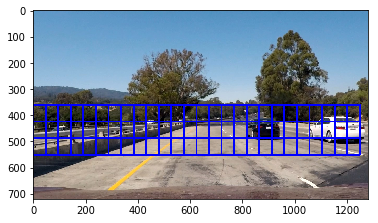

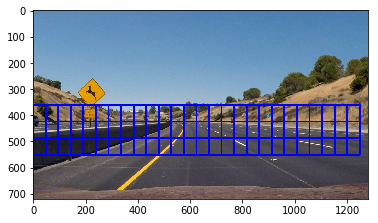

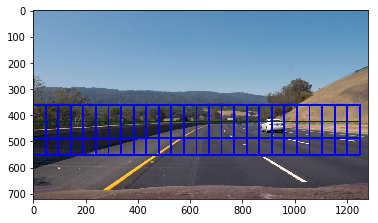

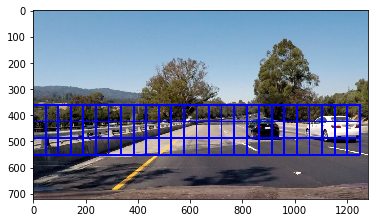

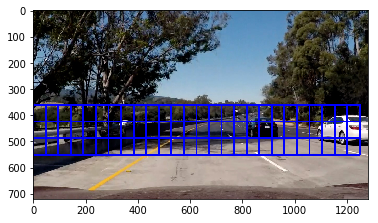

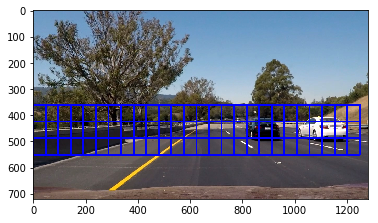

In [31]:
#####
# HOG Sub-sampling Window Search
####
'''
A more efficient method for doing the sliding window approach, one that allows us to only have to 
extract the Hog features once. The code below defines a single function find_cars that's able to 
both extract features and make predictions.

The find_cars only has to extract hog features once and then can be sub-sampled to get all of its 
overlaying windows. Each window is defined by a scaling factor where a scale of 1 would result in 
a window that's 8 x 8 cells then the overlap of each window is in terms of the cell distance. 
This means that a cells_per_step = 2 would result in a search window overlap of 75%. Its possible 
to run this same function multiple times for different scale values to generate multiple-scaled 
search windows.
'''
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from scipy.ndimage.measurements import label

def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=False, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        return features

def bin_spatial(img, size=(32, 32)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))
                        
def color_hist(img, nbins=32):    #bins_range=(0, 256)
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Draw Bounding Boxes
def draw_boxes(img, bboxes, color=(255, 0, 255), thick=6):
    # make a copy of the image
    draw_img = np.copy(img)
    # draw each bounding box on your image copy 
    # using cv2.rectangle()
    for each_bbox in bboxes:
        cv2.rectangle(draw_img, each_bbox[0], each_bbox[1], color, thick)
    # return the image copy with boxes drawn
    return draw_img # Change this line to return image copy with boxes

#def train_svc(images):
def train_svc(vehicle_images, non_vehicle_images):
    '''
    # Read in cars and notcars
    cars = []
    notcars = []

    for image in images:
        if 'image' in image.split('/')[-1] or 'extra' in image.split('/')[-1]:
            notcars.append(image)
        else:
            cars.append(image)
    
    print(len(cars))
    print(len(notcars))
    '''
    print(len(vehicle_images))
    print(len(non_vehicle_images))
    
    #car_features = extract_features(cars, color_space=color_space, 
    car_features = extract_features(vehicle_images, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
    #notcar_features = extract_features(notcars, color_space=color_space, 
    notcar_features = extract_features(non_vehicle_images, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)

    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)

    # Define the labels vector
    y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

    # Split up data into randomized training and test sets
    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(
        scaled_X, y, test_size=0.2, random_state=rand_state)

    print('Using:',orient,'orientations',pix_per_cell,
        'pixels per cell and', cell_per_block,'cells per block')
    print('Feature vector length:', len(X_train[0]))
    # Use a linear SVC 
    svc = LinearSVC()
    # Check the training time for the SVC
    t=time.time()
    svc.fit(X_train, y_train)
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to train SVC...')
    # Check the score of the SVC
    print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
    # Check the prediction time for a single sample
    t=time.time()
    
    return (svc, X_scaler)

# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    #draw_img = np.copy(img)
    
    draw_img = []
    
    img = img.astype(np.float32)/255
    img_tosearch = img[ystart:ystop,:,:]
 
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell
        
            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
          
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                
    return draw_img

    
def get_image_in_correct_color(img, color_space='RGB'):
     # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'HLS':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'LUV':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'YUV':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else:
        feature_img = np.copy(img)
    return feature_img

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32,32),
                     hist_bins=32, orient=9,
                     pix_per_cell=8, cell_per_block=2, hog_channel=0,
                     spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # Apply color conversion if other than 'RGB'
        feature_image = get_image_in_correct_color(image, color_space=color_space)
        
        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features
# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images    
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    feature_image = get_image_in_correct_color(img, color_space=color_space)     
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, 
                 x_start_stop=[None, None], 
                 y_start_stop=[None, None],
                 xy_window=(64,64),
                 xy_overlap=(0.5,0.5)):
    
    # If x and/or y start/stop positions are not defined
    # set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]    

    # Compute the span of the region to be searched
    
    x_span = x_start_stop[1] - x_start_stop[0]
    y_span = y_start_stop[1] - y_start_stop[0]
    
    # Compute the number of pixels per step in x/y
    n_x_pix_per_step = np.int(xy_window[0] * (1 - xy_overlap[0]))
    n_y_pix_per_step = np.int(xy_window[1] * (1 - xy_overlap[1]))
    
    # Compute the number of windows in x/y
    n_x_buffer = np.int(xy_window[0] * (xy_overlap[0]))
    n_y_buffer = np.int(xy_window[1] * (xy_overlap[1]))
    n_x_windows = np.int((x_span - n_x_buffer)/ n_x_pix_per_step)
    n_y_windows = np.int((y_span - n_y_buffer)/ n_y_pix_per_step)
    
    # Initialize a list to append window position to
    window_list = []
    
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(n_y_windows):
        for xs in range(n_x_windows):
            # Calculate each window position
            start_x = xs * n_x_pix_per_step + x_start_stop[0]
            end_x = start_x + xy_window[0]
            start_y = ys* n_y_pix_per_step + y_start_stop[0]
            end_y = start_y + xy_window[1]
            # Append window position to list
            window_list.append(((start_x, start_y), (end_x, end_y)))
    
    # Return the list of windows
    return window_list

# Define a function you will pass an image 
# and the list of windows to be searched 
# (output of slide_windows())
# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows

def classify_boxes(image, svc, X_scaler):
    # Uncomment the following line if you extracted training
    # data from .png images (scaled 0 to 1 by mpimg) and the
    # image you are searching is a .jpg (scaled 0 to 255)
    #image = image.astype(np.float32)/255
    
#     windows = slide_window(image, x_start_stop=[None, None], y_start_stop=(360, 600), 
#                         xy_window=(64, 64), xy_overlap=(0.75, 0.75))
#     windows += slide_window(image, x_start_stop=[None, None], y_start_stop=(372, 600), 
#                         xy_window=(96, 96), xy_overlap=(0.75, 0.75))
#     windows += slide_window(image, x_start_stop=[None, None], y_start_stop=(384, 600), 
#                         xy_window=(144, 144), xy_overlap=(0.75, 0.75))
# #     windows += slide_window(image, x_start_stop=[None, None], y_start_stop=(396, 600), 
# #                         xy_window=(192, 192), xy_overlap=(0.75, 0.75))

    windows = slide_window(image, x_start_stop=[None, None], y_start_stop=(360, 600), 
                        xy_window=(96, 128), xy_overlap=(0.5, 0.5))

    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)      
    return hot_windows


# Using Pickle
'''
dist_pickle = pickle.load( open("svc_pickle.p", "rb" ) )
svc = dist_pickle["svc"]
X_scaler = dist_pickle["scaler"]
'''

# Reduce the sample size because
# The quiz evaluator times out after 13s of CPU time
'''
sample_size = 500
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]
'''

### TODO: Tweak these parameters and see how the results change.
color_space = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb

orient = 9  # HOG orientations
pix_per_cell = 16 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 32) # Spatial binning dimensions
hist_bins = 32 # Number of histogram bins

spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

y_start_stop = [None, None] # Min and max in y to search in slide_window()

ystart = 400
ystop = 656
scale = 1.5

vehicle_images = glob.glob('datasets/classifying_images/vehicles/*/*.png')
non_vehicle_images =  glob.glob('datasets/classifying_images/non_vehicles/*/*.png')

#svc, X_scaler = train_svc(images)
svc, X_scaler = train_svc(vehicle_images, non_vehicle_images)

#img = mpimg.imread('spatial_bin/test_img.jpg')
print('Using:', svc, 'SVM', X_scaler, 'X_scaler', orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block with',
    spatial_size, 'spatial_size and', hist_bins, 'histogram bins')

test_images = glob.glob('test_images/*.jpg')
windows = {}
for fname in test_images:
    fig = plt.figure()
    image = mpimg.imread(fname)

    windows[fname] = classify_boxes(image, svc, X_scaler)
    draw_image = np.copy(image)
    window_img = draw_boxes(draw_image, windows[fname], color=(0, 0, 255), thick=6)                    
    plt.imshow(window_img)
    plt.show()


In [ ]:
'''
For find_cars 
Parameters to Set
Using: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) SVM StandardScaler(copy=True, with_mean=True, with_std=True) X_scaler 9 orientations 8 pixels per cell and 2 cells per block with (32, 32) spatial_size and 32 histogram bins
'''

In [ ]:
# HANDLING DUPLICATES and FALSE POSITIVES (using HEAT MAPS)
# We need to Combine Duplicate Detections (multiple bounding 
# boxes on the same vehicle) and Reject False Positive (bounding boxes
# where there is no vehicle)
# and filter them out
# - identify where vehicles are on the road
# - identify where vehicles are NOT on the road

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from scipy.ndimage.measurements import label

# We need to determine the best esitmate of position and size of the car
# to filter out duplicate detections and false positives
# To make a heat-map, you're simply going to add "heat" (+=1) for all pixels 
# within windows where a positive detection is reported by your classifier.

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap # Iterate through list of bboxes

# If the classifier is working well, then the "hot" parts of the map 
# are where the cars are, and by imposing a threshold, you can reject 
# areas affected by false positives. 

#def apply_threshold(heatmap, threshold):
def reject_false_positives(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

# Once you have a thresholded heat-map, there are many ways you could go 
# about trying to figure out how many cars you have in each frame and 
# which pixels belong to which cars, but one of the most straightforward 
# solutions is to use the label() function from scipy.ndimage.measurements.

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

# Read in a pickle file with bboxes saved
# Each item in the "all_bboxes" list will contain a 
# list of boxes for one of the images shown above
box_list = pickle.load( open( "bbox_pickle.p", "rb" ))

# Read in image similar to one shown above 
image = mpimg.imread('test_image.jpg')
heat = np.zeros_like(image[:,:,0]).astype(np.float)

# Add heat to each box in box list
heat = add_heat(heat,box_list)
    
# Apply threshold to help remove false positives
# heat = apply_threshold(heat,1)
heat = reject_false_positives(heat,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()

//anaconda/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


5966
8968
Using: 12 orientations 16 pixels per cell and 2 cells per block
Feature vector length: 1296
1.49 Seconds to train SVC...
Test Accuracy of SVC =  0.9913
Using: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) SVM StandardScaler(copy=True, with_mean=True, with_std=True) X_scaler 12 orientations 16 pixels per cell and 2 cells per block with (16, 16) spatial_size and 32 histogram bins


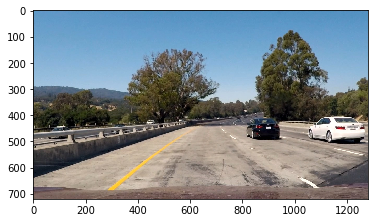

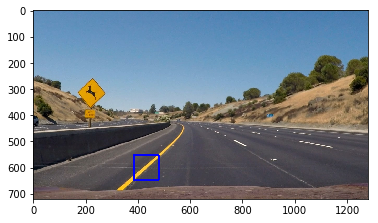

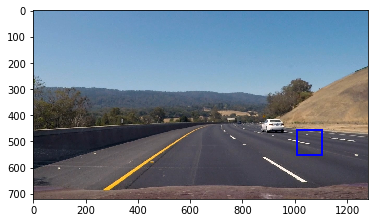

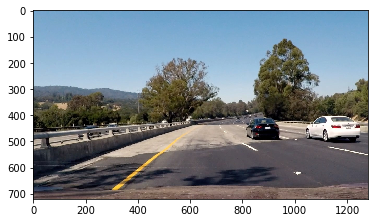

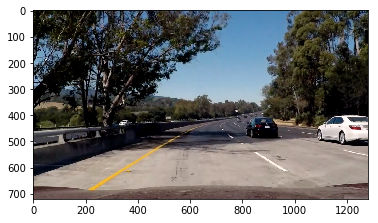

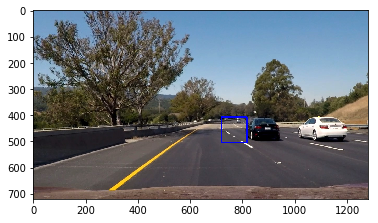

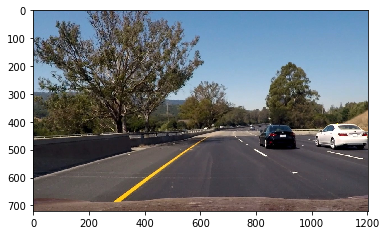

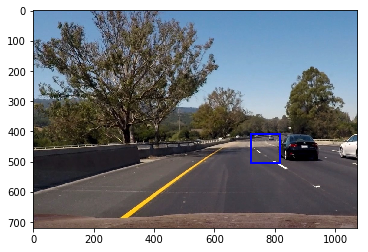

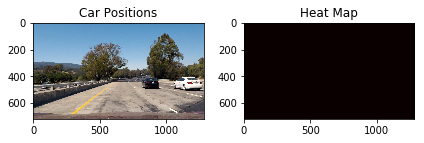

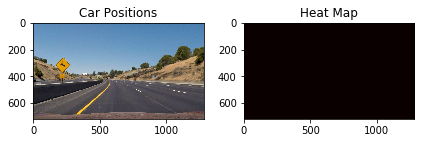

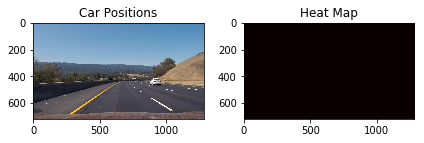

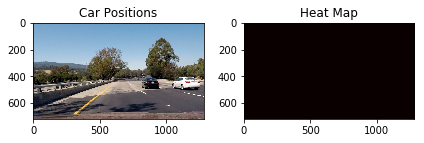

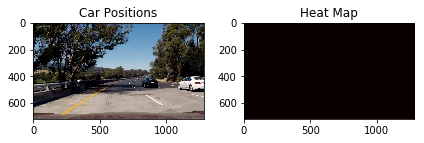

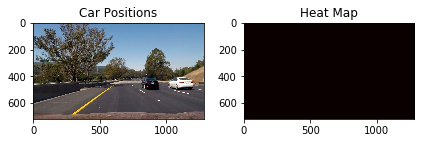

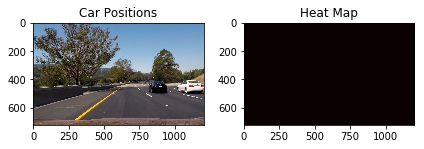

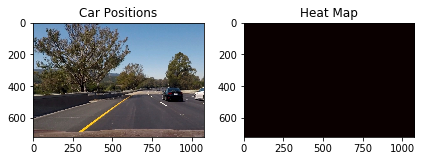

In [11]:
# TRACKING PIPELINE

# Data Exploration -> Extract Features ( Color Spaces (bin_spatial, color_hist) / Gradients ) 
# -> Normalization -> Classification (1. Using Color 2. Using HOG) -> Tuning Classifier 
# (Parameter Tweaking) -> Object Detection (Using Sliding Windows / / HOG Sub Sampling)
# -> Filter Duplicates and False Positives (Heatmap) -> Draw boxes

# In each frame of the window, we need to 
# detect a vehicle using a sliding window technique
# wherever the classifier returns a positive detection
# record the position of the window where the detection was made
# when duplicate detection of the same vehicle is made, then we 
# can record the position of the detection to the centroid of the 
# overlapping windows. 
# To handle false positives, which needs to be filtered out to find out
# which detections appear in one frame but not the next
# once we have a high confidence detection, you can record how the centroid is
# moving from frame to frame and eventually estimate where it will appear in
# each subsequent frame

# Steps for the Project
# 1. Decide what features to use 
# - try combination of color and gradient features (may require trial and error)
# 2. Train a classifier
# - LinearSVC is probably best better for speed and accuracy
# 3. Next we implement a sliding window technique to search for vehicles and some test images
# - try multiscale search or try different tiling schemes to see what works best
# - try to minimize number of search windows (use y_start and y_end)
# 4. Combine duplicates and filter false project to create a working pipeline
# 5. Apply pipeline against a video stream to detect vehicles realtime

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from scipy.ndimage.measurements import label

def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ghist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    bhist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    ## Generating bin centers
    #bin_edges = rhist[1]
    #bin_centers = (bin_edges[1:] + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    #return rhist, ghist, bhist, bin_centers, hist_features
    return hist_features

def get_image_in_correct_color(img, color_space='RGB'):
     # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'HLS':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'LUV':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'YUV':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else:
        feature_img = np.copy(img)
    return feature_img

def bin_spatial(img, size=(32,32)):
    # Use cv2.resize() to resize the image
    feature_img_small = cv2.resize(img, size)
    #print(feature_img_small.shape)
   
    # Use cv2.resize().ravel() to create the feature vector
    feature_vector = feature_img_small.ravel()
    #print(feature_vector.shape)
    
    # Return the feature vector
    return feature_vector

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

# Draw Bounding Boxes
def draw_boxes(img, bboxes, color=(255, 0, 255), thick=6):
    # make a copy of the image
    draw_img = np.copy(img)
    # draw each bounding box on your image copy 
    # using cv2.rectangle()
    for each_bbox in bboxes:
        cv2.rectangle(draw_img, each_bbox[0], each_bbox[1], color, thick)
    # return the image copy with boxes drawn
    return draw_img # Change this line to return image copy with boxes

# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, 
                 x_start_stop=[None, None], 
                 y_start_stop=[None, None],
                 xy_window=(64,64),
                 xy_overlap=(0.5,0.5)):
    
    # If x and/or y start/stop positions are not defined
    # set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]    

    # Compute the span of the region to be searched
    
    x_span = x_start_stop[1] - x_start_stop[0]
    y_span = y_start_stop[1] - y_start_stop[0]
    
    # Compute the number of pixels per step in x/y
    n_x_pix_per_step = np.int(xy_window[0] * (1 - xy_overlap[0]))
    n_y_pix_per_step = np.int(xy_window[1] * (1 - xy_overlap[1]))
    
    # Compute the number of windows in x/y
    n_x_buffer = np.int(xy_window[0] * (xy_overlap[0]))
    n_y_buffer = np.int(xy_window[1] * (xy_overlap[1]))
    n_x_windows = np.int((x_span - n_x_buffer)/ n_x_pix_per_step)
    n_y_windows = np.int((y_span - n_y_buffer)/ n_y_pix_per_step)
    
    # Initialize a list to append window position to
    window_list = []
    
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(n_y_windows):
        for xs in range(n_x_windows):
            # Calculate each window position
            start_x = xs * n_x_pix_per_step + x_start_stop[0]
            end_x = start_x + xy_window[0]
            start_y = ys* n_y_pix_per_step + y_start_stop[0]
            end_y = start_y + xy_window[1]
            # Append window position to list
            window_list.append(((start_x, start_y), (end_x, end_y)))
    
    # Return the list of windows
    return window_list

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32,32),
                     hist_bins=32, orient=9,
                     pix_per_cell=8, cell_per_block=2, hog_channel=0,
                     spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # Apply color conversion if other than 'RGB'
        feature_image = get_image_in_correct_color(image, color_space=color_space)
        
        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images    
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    feature_image = get_image_in_correct_color(img, color_space=color_space)     
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

# Define a function you will pass an image 
# and the list of windows to be searched 
# (output of slide_windows())
# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap # Iterate through list of bboxes

# If the classifier is working well, then the "hot" parts of the map 
# are where the cars are, and by imposing a threshold, you can reject 
# areas affected by false positives. 

#def apply_threshold(heatmap, threshold):
def reject_false_positives(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

# Once you have a thresholded heat-map, there are many ways you could go 
# about trying to figure out how many cars you have in each frame and 
# which pixels belong to which cars, but one of the most straightforward 
# solutions is to use the label() function from scipy.ndimage.measurements.

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

def train_classifier(images):
    cars = []
    notcars = []
    for image in images:
        if 'image' in image or 'extra' in image:
            notcars.append(image)
        else:
            cars.append(image)
    '''
    # Reduce the sample size 
    sample_size = 500
    cars = cars[0:sample_size]
    notcars = notcars[0:sample_size]
    '''
    
    print(len(cars))
    print(len(notcars))

    car_features = extract_features(cars, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
    notcar_features = extract_features(notcars, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)

    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)

    # Define the labels vector
    y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

    # Split up data into randomized training and test sets
    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(
        scaled_X, y, test_size=0.2, random_state=rand_state)

    print('Using:',orient,'orientations',pix_per_cell,
        'pixels per cell and', cell_per_block,'cells per block')
    print('Feature vector length:', len(X_train[0]))
    # Use a linear SVC 
    svc = LinearSVC()
    # Check the training time for the SVC
    t=time.time()
    svc.fit(X_train, y_train)
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to train SVC...')
    # Check the score of the SVC
    print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
    # Check the prediction time for a single sample
    t=time.time()

    return svc, X_scaler

def slide_and_search_windows(image, svc, scaler):
    windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(96, 96), xy_overlap=(0.5, 0.5))

    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
    return hot_windows

### TODO: Tweak these parameters and see how the results change.
color_space = 'HLS' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 12  # HOG orientations
pix_per_cell = 16 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 32 # Number of histogram bins
spatial_feat = False # Spatial features on or off
hist_feat = False # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()

y_start = round(image.shape[0]/2) #half the height of the image
y_end = round(image.shape[0])
y_start_stop = [y_start, y_end]

#print(y_start, y_end)

# Read in cars and notcars
images = glob.glob('datasets/vehicles_non_vehicles/*.png')
svc, X_scaler = train_classifier(images)

'''
vehicle_images = glob.glob('datasets/classifying_images/vehicles/*/*.png')
non_vehicle_images =  glob.glob('datasets/classifying_images/non_vehicles/*/*.png')
svc, X_scaler = train_svc(vehicle_images, non_vehicle_images)
'''

#img = mpimg.imread('spatial_bin/test_img.jpg')
print('Using:', svc, 'SVM', X_scaler, 'X_scaler', orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block with',
    spatial_size, 'spatial_size and', hist_bins, 'histogram bins')

test_images = glob.glob('test_images/*.jpg')
windows = {}
for fname in test_images:
    fig = plt.figure()
    image = mpimg.imread(fname)
    windows[fname] = slide_and_search_windows(image, svc, X_scaler)
    draw_image = np.copy(image)
    window_img = draw_boxes(draw_image, windows[fname], color=(0, 0, 255), thick=6)                    
    plt.imshow(window_img)
    plt.show()
    

'''
for fname in test_images:
    fig = plt.figure()
    image = mpimg.imread(fname)
    windows[fname] = slide_and_search_windows(image, svc, X_scaler)
    draw_image = np.copy(image)
    ystart = 400
    ystop = 656
    scale = 2
    out_img = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    plt.imshow(out_img)
    plt.show()
    
    
image = mpimg.imread('bbox-example-image.jpg')

hot_windows = slide_and_search_windows(image, svc, X_scaler)

draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
#image = image.astype(np.float32)/255                       

#print(hot_windows)
window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(window_img)
plt.show()


box_list = []
box_list = hot_windows
#print(box_list)
heat = np.zeros_like(image[:,:,0]).astype(np.float)

# Add heat to each box in box list
heat = add_heat(heat, box_list)
    
# Apply threshold to help remove false positives
# heat = apply_threshold(heat,1)
heat = reject_false_positives(heat,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()
plt.show()
'''

for fname in test_images:
    fig = plt.figure()
    image = mpimg.imread(fname)
    box_list = windows[fname]
    
    heat = np.zeros_like(image[:,:,0]).astype(np.float)

    # Add heat to each box in box list
    heat = add_heat(heat, box_list)

    # Apply threshold to help remove false positives
    heat = reject_false_positives(heat,1)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)

    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(draw_img)
    plt.title('Car Positions')
    plt.subplot(122)
    plt.imshow(heatmap, cmap='hot')
    plt.title('Heat Map')
    fig.tight_layout()
    plt.show()